
--- 계층적 군집화 구현 테스트 ---
[Hierarchical] 군집화 완료.


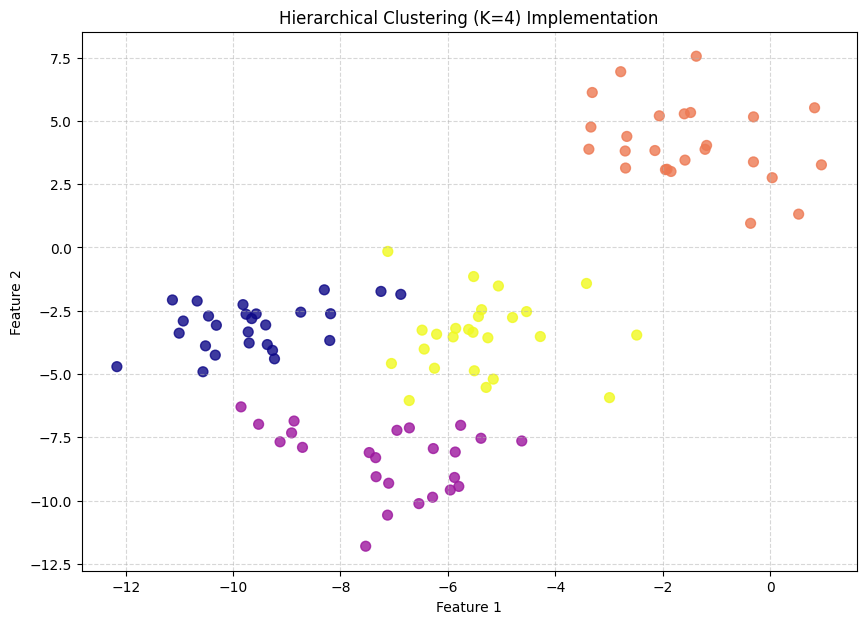

In [1]:
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class AgglomerativeClustering:
    """ 병합형 계층적 군집화 """

    def __init__(self, n_clusters=2):
        """
        n_clusters: 목표 최종 군집 수
        """
        self.n_clusters = n_clusters
        self.clusters = None # 군집 리스트 (데이터 인덱스로 관리)

    def fit_predict(self, X):
        """
        데이터 X를 n_clusters 개의 군집으로 분류하고 레이블을 반환합니다.
        (참고: O(N^3)의 비효율적인 구현입니다. 개념 이해용)
        """
        n_samples = X.shape[0]

        # 1. 초기화: 모든 점을 각각의 클러스터로 (인덱스 리스트로 관리)
        # self.clusters = [ [0], [1], [2], ... ]
        self.clusters = [[i] for i in range(n_samples)]

        # 2. 원하는 클러스터 개수가 될 때까지 반복
        while len(self.clusters) > self.n_clusters:
            min_dist = float('inf')
            closest_pair = (-1, -1) # (cluster_idx1, cluster_idx2)

            # 3. 모든 클러스터 쌍 사이의 거리 계산 (O(N^2))
            # (각 거리 계산도 O(N)이므로 총 O(N^3))
            for i in range(len(self.clusters)):
                for j in range(i + 1, len(self.clusters)):
                    # 군집 간 거리 계산 (여기서는 '중심점(Centroid)' 연결법 사용)
                    dist = self._cluster_distance_centroid(self.clusters[i], self.clusters[j], X)

                    if dist < min_dist:
                        min_dist = dist
                        closest_pair = (i, j)

            # 4. 가장 가까운 두 클러스터 병합
            i, j = closest_pair
            merged_cluster = self.clusters[i] + self.clusters[j]

            # 기존 두 클러스터 삭제 (인덱스가 큰 것부터 삭제해야 안전)
            self.clusters.pop(max(i, j))
            self.clusters.pop(min(i, j))

            # 병합된 클러스터 추가
            self.clusters.append(merged_cluster)

            # 진행 상황 모니터링 (선택적)
            # if len(self.clusters) % 10 == 0:
            #     print(f"현재 군집 수: {len(self.clusters)}")

        print("[Hierarchical] 군집화 완료.")

        # 5. 최종 클러스터 결과에 따라 레이블 부여
        labels = np.zeros(n_samples)
        for cluster_idx, cluster in enumerate(self.clusters):
            for point_idx in cluster:
                labels[point_idx] = cluster_idx

        return labels.astype(int)

    def _cluster_distance_centroid(self, cluster1_indices, cluster2_indices, X):
        """
        두 군집 간의 거리 계산 (중심점 연결법)
        clusterX_indices: 군집에 속한 데이터의 '원본 인덱스' 리스트
        """
        cluster1_points = X[cluster1_indices]
        cluster2_points = X[cluster2_indices]

        centroid1 = np.mean(cluster1_points, axis=0)
        centroid2 = np.mean(cluster2_points, axis=0)

        return euclidean_distance(centroid1, centroid2)

# --- 사용 예제 (시각화) ---
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    from sklearn.datasets import make_blobs

    print("\n--- 계층적 군집화 구현 테스트 ---")

    # 1. 데이터 생성
    K = 4
    X, y_true = make_blobs(n_samples=100, centers=K, n_features=2,
                           random_state=1, cluster_std=1.5)

    # 2. 모델 생성 및 군집화
    agg_cluster = AgglomerativeClustering(n_clusters=K)
    y_pred = agg_cluster.fit_predict(X)

    # 3. 시각화
    plt.figure(figsize=(10, 7))
    plt.title(f"Hierarchical Clustering (K={K}) Implementation")

    # 예측된 군집 결과
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='plasma', alpha=0.8)

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()